In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  #将本题中所需所有模块导入

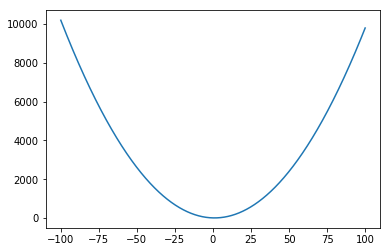

In [3]:
#Problem 3.1
x = np.arange(-100,100,0.001)  #取点要保证足够细密，否则无法画出光滑的曲线
y = x**2 - 2*x + 1
plt.plot(x,y)
plt.show()

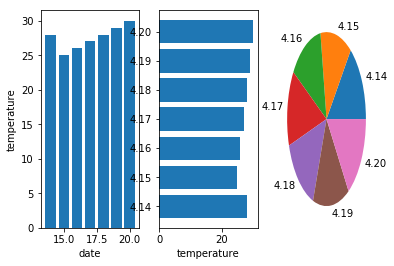

In [5]:
#Problem 3.2
data = [28,25,26,27,28,29,30]  #我选取了近7天的平均气温作为自定义数据
x = np.arange(14,21,1)
fig = plt.figure()
subplot = fig.add_subplot(1, 3, 1) # 1表示1行，3表示3列，1表示1行3列中的索引位置1
plt.bar(x,data)
plt.xlabel('date')            #增加相应标签，使图像更加准确美观
plt.ylabel('temperature')
subplot = fig.add_subplot(1, 3, 2) # 1表示1行，3表示3列，2表示1行3列中的索引位置2
plt.barh(x,data)
plt.yticks(x, ['4.14', '4.15', '4.16', '4.17', '4.18','4.19','4.20'])
plt.xlabel('temperature')
subplot = fig.add_subplot(1, 3, 3) # 1表示1行，3表示3列，3表示1行3列中的索引位置3
plt.pie(data,labels=['4.14', '4.15', '4.16', '4.17', '4.18','4.19','4.20'])
plt.show()

In [36]:
#Problem 3.3
row = np.linspace(0,4,5,dtype = np.int8)  #0到4的行向量
matrix1 = np.array([[row]*5])             #5个行向量构成矩阵
print(matrix1)
import random                            #或者是生成0到4范围内的5x5随机数矩阵
matrix2 = np.array([[random.randint(0,4) for _ in range(5)] for _ in range(5)])
print(matrix2)

[[[0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]]]
[[3 0 4 2 2]
 [2 2 2 2 2]
 [1 1 0 4 1]
 [1 3 0 4 1]
 [3 2 4 3 2]]


In [79]:
#Problem 3.4
import numpy as np   #生成幻方的代码改写自CSDN

#列表循环向左移offset位
def shift_left(lst, offset):
    return [lst[(i+offset)%len(lst)] for i in range(len(lst))]

#列表循环向右移offset位
def shift_right(lst, offset):
    return [lst[i-offset] for i in range(len(lst))]

#构造奇数阶幻方函数
def magic_of_odd_order(n):
    p = (int)((n-1)/2)

    #创建矩阵1
    initial_lst1 = list(range(p+1,n))+list(range(p+1))
    initial_mat1 = []
    for i in range(n):
        initial_mat1.append(shift_left(initial_lst1, i))
    mat1 = np.array(initial_mat1)

    #创建矩阵2
    initial_lst2 = list(range(p,-1,-1))+list(range(2*p,p,-1))
    initial_mat2 = []
    for i in range(n):
        initial_mat2.append(shift_right(initial_lst2, i))
    mat2 = np.array(initial_mat2)

    #创建矩阵3,即元素全为1的矩阵
    mat3= np.ones((n,n),dtype=np.int)

    #构造幻方
    magic = n*mat2+mat1+mat3
    return magic

#构造4n阶幻方函数
def magic_of_4n_order(n):
    mat = np.array(range(1,n*n+1)).reshape(n,n)
    for i in range((int)(n/4)):
        for j in range((int)(n/4)):
            for k in range(4): #将每个4*4小方块的对角线换成互补元素
                mat[k+4*j][k+4*i] = n*n+1-mat[k+4*j][k+4*i]
                mat[k+4*j][3-k+4*i] = n*n+1-mat[k+4*j][3-k+4*i]

    return mat

#构造4n+2阶幻方函数
def magic_of_4n2_order(n):
    p = (int)(n/2)
    matA = magic_of_odd_order(p)
    matD = matA+p**2
    matB = matD+p**2
    matC = matB+p**2

    #交换矩阵块A与矩阵块C中特定元素的位置
    row = (int)((p-1)/2)
    for i in range(p):
        if i != row:
            for k in range((int)((n-2)/4)):
                matA[i][k],matC[i][k] = matC[i][k],matA[i][k]
        else:
            for k in range((int)((n-2)/4)):
                matA[i][row+k],matC[i][row+k] = matC[i][row+k],matA[i][row+k]

    #交换矩阵块B与矩阵块D中特定元素的位置
    col = (int)((p-1)/2)
    for j in range(col+2-(int)((n-2)/4),col+1):
        for i in range(p):
            matB[i][j],matD[i][j] = matD[i][j],matB[i][j]

    #合并矩阵块A,B,C,D组成幻方
    magic = np.row_stack((np.column_stack((matA,matB)),np.column_stack((matC,matD))))
    return magic

def main():
    order = eval(input('Enter the order of magic square(>=3): '))

    if order%2 ==1:
        magic = magic_of_odd_order(order)
    elif order%4 == 0:
        magic = magic_of_4n_order(order)
    else:
        magic = magic_of_4n2_order(order)
    return magic


matrix = main()    #构造10阶幻方即10x10矩阵
print(matrix)
for j in range(8):        #通过双层循环 将所有3x3的矩阵打印出来
    for i in range(8):
        print(matrix[i:i+3, j:j+3])
        print(matrix[j:j+3, i:i+3])

[[ 89  85   1  22  18  64  60  26  72  68]
 [ 95  86   7   3  24  70  61  32  53  74]
 [ 21  17  88  84   5  71  67  38  59  55]
 [ 77  98  19  15   6  52  73  44  65  56]
 [ 83  79  25  16  12  58  54  50  66  62]
 [ 14  10  76  97  93  39  35  51  47  43]
 [ 20  11  82  78  99  45  36  57  28  49]
 [ 96  92  13   9  80  46  42  63  34  30]
 [  2  23  94  90  81  27  48  69  40  31]
 [  8   4 100  91  87  33  29  75  41  37]]
[[89 85  1]
 [95 86  7]
 [21 17 88]]
[[89 85  1]
 [95 86  7]
 [21 17 88]]
[[95 86  7]
 [21 17 88]
 [77 98 19]]
[[85  1 22]
 [86  7  3]
 [17 88 84]]
[[21 17 88]
 [77 98 19]
 [83 79 25]]
[[ 1 22 18]
 [ 7  3 24]
 [88 84  5]]
[[77 98 19]
 [83 79 25]
 [14 10 76]]
[[22 18 64]
 [ 3 24 70]
 [84  5 71]]
[[83 79 25]
 [14 10 76]
 [20 11 82]]
[[18 64 60]
 [24 70 61]
 [ 5 71 67]]
[[14 10 76]
 [20 11 82]
 [96 92 13]]
[[64 60 26]
 [70 61 32]
 [71 67 38]]
[[20 11 82]
 [96 92 13]
 [ 2 23 94]]
[[60 26 72]
 [61 32 53]
 [67 38 59]]
[[ 96  92  13]
 [  2  23  94]
 [  8   4 100]]
[[26 

In [7]:
#Problem 3.5
df = pd.DataFrame(np.random.randn(4, 5), columns=['A', 'B', 'C', 'D', 'E'])   #生成4*5的随机数DataFrame
print(df)
df.loc['sum'] = df.apply(lambda x: x.sum())                                   #计算每一列之和并添加为新行
print(df)
df.sort_values(by=['sum'], axis=1, inplace=True)                              #将DataFrame按照sum这一行的值排序
print(df)                                                                     #由此可得D列随机数之和最小

          A         B         C         D         E
0  0.418586  1.020164 -0.697526 -1.112230  0.305835
1 -1.585667  0.426758  0.480073  0.100724  0.106594
2 -0.382961  0.543760  0.505512  0.220012  0.841195
3  0.980622 -0.212383 -0.123964  0.085467  0.017518
            A         B         C         D         E
0    0.418586  1.020164 -0.697526 -1.112230  0.305835
1   -1.585667  0.426758  0.480073  0.100724  0.106594
2   -0.382961  0.543760  0.505512  0.220012  0.841195
3    0.980622 -0.212383 -0.123964  0.085467  0.017518
sum -0.569421  1.778299  0.164094 -0.706028  1.271143
            D         A         C         E         B
0   -1.112230  0.418586 -0.697526  0.305835  1.020164
1    0.100724 -1.585667  0.480073  0.106594  0.426758
2    0.220012 -0.382961  0.505512  0.841195  0.543760
3    0.085467  0.980622 -0.123964  0.017518 -0.212383
sum -0.706028 -0.569421  0.164094  1.271143  1.778299


In [45]:
#Problem 3.6
import datetime    #引入相关模块，为索引的生成做准备
import collections
import random
def week_date_end(year=2015):
    '该函数将2015年所有周日日期写入字典'
    start_date=datetime.datetime.strptime(str(int(year)-1)+'1224','%Y%m%d')  #2015年第一周的起始日期（在14年）
    end_date=datetime.datetime.strptime(str(int(year)+1)+'0107','%Y%m%d')    #2015年最后一周的终末日期（在16年）
    _u=datetime.timedelta(days=1)
    n=0
    week_date={}
    while 1:        
        _time=start_date+n*_u
        y,w=_time.isocalendar()[:2]
        if y==year :
            week_date.setdefault(w,[]).append(_time.strftime('%Y%m%d'))
        n=n+1
        if _time==end_date:
            break
    week_date_end={}     #创建字典，该字典存储所有周日日期
    for i in week_date:
       week_date_end[week_date[i][-1]]=[random.random()]   #周日日期为key，随机数为value
    return week_date_end
myvar = pd.Series(week_date_end())                         #使用 key/value 对象（字典）来创建 Series
print(myvar)

20150104     [0.24248444824366755]
20150111      [0.5647841144066111]
20150118     [0.37037651286463513]
20150125     [0.04755799472520328]
20150201     [0.48635089874260407]
20150208     [0.19353606477413843]
20150215       [0.693002790724669]
20150222     [0.08919969280866835]
20150301      [0.3619458506007056]
20150308      [0.4931453003252909]
20150315      [0.3836226068430185]
20150322      [0.6890240651284053]
20150329      [0.8203201618589786]
20150405    [0.056225449879661715]
20150412      [0.6575201448503729]
20150419      [0.7376193102036451]
20150426      [0.5128530168630541]
20150503     [0.14169104723931403]
20150510      [0.5024360911076023]
20150517     [0.42307290989331514]
20150524        [0.67369701420878]
20150531     [0.37308139109992033]
20150607      [0.0868590248761909]
20150614     [0.21560088504684516]
20150621      [0.7505166289475518]
20150628      [0.6567972778386599]
20150705       [0.526661319651762]
20150712      [0.3282664778890598]
20150719      [0.506